<a href="https://colab.research.google.com/github/Bidofvic/machine-learning/blob/main/Monkeypox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Understanding**

In [1]:
from google.colab import files
files.uploaded = files.upload()

Saving Monkeypox Dataset_Adjusted.csv to Monkeypox Dataset_Adjusted.csv


In [26]:
# Importing Library Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
#import pandas as pd
#import numpy as np

# Imputation Techniques

from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold

# Feature Selection Techniques

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV
from lightgbm import LGBMClassifier
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Models

from xgboost import XGBClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

# Scaling

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Metrics

from sklearn.metrics import auc
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix

# Imbalance Optimisation

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

In [3]:
# Importing Dataset
df = pd.read_csv('/content/Monkeypox Dataset_Adjusted.csv')

In [4]:
# Displaying the first 10 rows of the dataset

df.tail()

,Test ID,Systemic Illness,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Red blood cells count,White blood cells count,Home ownership,Age,Month of Birth,Health Insurance,Sexually Transmitted Infection,MPOX PCR Result
24995,AH33692,None,0.0,1.0,1,0.0,1.0,1,0.0,0.0,5774935,9537,1,56.0,1,0,1.0,Positive
24996,AH33693,Fever,1.0,0.0,1,1.0,0.0,1,1.0,1.0,4719924,7596,1,50.0,10,1,1.0,Positive
24997,AH33694,None,0.0,1.0,1,0.0,0.0,1,1.0,0.0,4254616,10949,0,24.0,12,1,0.0,Positive
24998,AH33695,Swollen Lymph Nodes,3.0,0.0,1,0.0,1.0,1,1.0,0.0,5440155,6006,1,56.0,9,1,0.0,Negative
24999,AH33696,Swollen Lymph Nodes,3.0,0.0,0,1.0,0.0,0,1.0,1.0,5398533,7850,0,47.0,7,0,0.0,Positive


In [5]:
df.shape

(25000, 18)

In [6]:
# Identifying Missing Values

df.isna().sum()

Test ID                            0
Systemic Illness                   2
Encoded Systemic Illness           2
Rectal Pain                        3
Sore Throat                        0
Penile Oedema                      6
Oral Lesions                       4
Solitary Lesion                    0
Swollen Tonsils                    7
HIV Infection                      5
Red blood cells count              0
White blood cells count            0
Home ownership                     0
Age                               40
Month of Birth                     0
Health Insurance                   0
Sexually Transmitted Infection     4
MPOX PCR Result                    0
dtype: int64

In [7]:
df.columns

Index(['Test ID', 'Systemic Illness', 'Encoded Systemic Illness',
       'Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions',
       'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection',
       'Red blood cells count', 'White blood cells count', 'Home ownership',
       'Age', 'Month of Birth', 'Health Insurance',
       'Sexually Transmitted Infection', 'MPOX PCR Result'],
      dtype='object')

(array([], dtype=int64),)


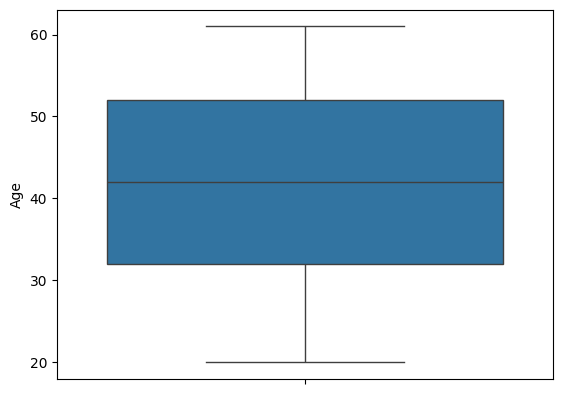

In [8]:
# Box Plot

sns.boxplot(df['Age'])

# Position of the Outlier

print(np.where(df['Age']>61))

In [9]:
''' Detection '''
# IQR
Q1 = np.percentile(df['Age'], 25,
                   method = 'midpoint')

Q3 = np.percentile(df['Age'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df.shape)

# Upper bound
upper = np.where(df['Age'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['Age'] <= (Q1-1.5*IQR))

''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape)

Old Shape:  (25000, 18)
New Shape:  (25000, 18)


<Axes: xlabel='MPOX PCR Result', ylabel='count'>

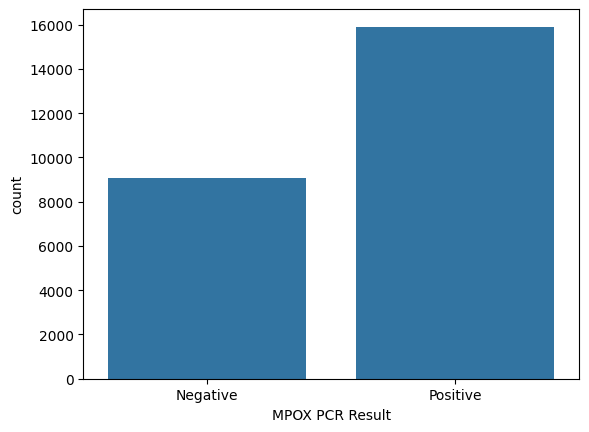

In [10]:
# Distribution of Class Variable

sns.countplot(x='MPOX PCR Result', data=df)

In [11]:
# Total number of patient by Systemic Illness
df['Systemic Illness'].value_counts()

Fever                    6381
Swollen Lymph Nodes      6252
None                     6214
Muscle Aches and Pain    6150
fever                       1
Name: Systemic Illness, dtype: int64

# **Data Preparation**

# ***Encoding Categorical Features***



In [12]:
# Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

# Convert string labels into numbers

df['Systemic Illness']=le.fit_transform(df['Systemic Illness'])
df['MPOX PCR Result']=le.fit_transform(df['MPOX PCR Result'])

In [13]:
# Transform the Oral Lesions from non-numeric to numeric.
Oral_Lesions_Transform = {'YES': 1, 'NO': 0}


In [14]:
df.head()

,Test ID,Systemic Illness,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Red blood cells count,White blood cells count,Home ownership,Age,Month of Birth,Health Insurance,Sexually Transmitted Infection,MPOX PCR Result
0,AA0021,2,0.0,0.0,1,1.0,1.0,0,1.0,0.0,5363690,9382,1,37.0,10,0,0.0,0
1,AA0022,0,1.0,1.0,0,1.0,1.0,0,0.0,1.0,5797376,7891,0,24.0,7,1,0.0,1
2,AA0023,0,1.0,0.0,1,1.0,0.0,0,0.0,1.0,4509503,9424,0,34.0,11,1,0.0,1
3,AA0024,2,0.0,1.0,0,0.0,0.0,1,1.0,1.0,4613306,4608,1,40.0,3,0,0.0,1
4,AA0025,3,3.0,1.0,1,1.0,0.0,0,1.0,1.0,5423126,10668,1,36.0,8,0,0.0,1


# **Feature Selection**

In [16]:
# Dropping the rows and columns

df.drop('Test ID', axis=1, inplace=True)
df.drop('Red blood cells count', axis=1, inplace=True)
df.drop('White blood cells count', axis=1, inplace=True)
df.drop('Home ownership', axis=1, inplace=True)
df.drop('Month of Birth', axis=1, inplace=True)
df.drop('Health Insurance', axis=1, inplace=True)

KeyError: "['Test ID'] not found in axis"

In [17]:
df.tail()

,Systemic Illness,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Age,Sexually Transmitted Infection,MPOX PCR Result
24995,2,0.0,1.0,1,0.0,1.0,1,0.0,0.0,56.0,1.0,1
24996,0,1.0,0.0,1,1.0,0.0,1,1.0,1.0,50.0,1.0,1
24997,2,0.0,1.0,1,0.0,0.0,1,1.0,0.0,24.0,0.0,1
24998,3,3.0,0.0,1,0.0,1.0,1,1.0,0.0,56.0,0.0,0
24999,3,3.0,0.0,0,1.0,0.0,0,1.0,1.0,47.0,0.0,1


In [18]:
# Find out the percentage of missing values in each column

df.isna().sum()/len(df)*100

Systemic Illness                  0.000
Encoded Systemic Illness          0.008
Rectal Pain                       0.012
Sore Throat                       0.000
Penile Oedema                     0.024
Oral Lesions                      0.016
Solitary Lesion                   0.000
Swollen Tonsils                   0.028
HIV Infection                     0.020
Age                               0.160
Sexually Transmitted Infection    0.016
MPOX PCR Result                   0.000
dtype: float64

In [19]:
# Descriptive Statistics

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Systemic Illness,25000.0,1.493920,1.123323,0.0,0.0,1.0,3.0,5.0
Encoded Systemic Illness,24998.0,1.497640,1.116872,0.0,1.0,1.0,3.0,3.0
Rectal Pain,24997.0,0.493819,0.499972,0.0,0.0,0.0,1.0,1.0
Sore Throat,25000.0,0.502160,0.500005,0.0,0.0,1.0,1.0,1.0
Penile Oedema,24994.0,0.504441,0.499990,0.0,0.0,1.0,1.0,1.0
Oral Lesions,24996.0,0.499480,0.500010,0.0,0.0,0.0,1.0,1.0
Solitary Lesion,25000.0,0.501080,0.500009,0.0,0.0,1.0,1.0,1.0
Swollen Tonsils,24993.0,0.501260,0.500008,0.0,0.0,1.0,1.0,1.0
HIV Infection,24995.0,0.503301,0.499999,0.0,0.0,1.0,1.0,1.0
Age,24960.0,42.055409,11.191496,20.0,32.0,42.0,52.0,61.0


# **Data Modelling**

In [20]:
# Scaling
from sklearn.preprocessing import StandardScaler

In [21]:
# Splitting of variables into dependent and independent variables

X = df.drop(["MPOX PCR Result"], axis = 1)
y = df["MPOX PCR Result"]

In [22]:
X.head()

,Systemic Illness,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Age,Sexually Transmitted Infection
0,2,0.0,0.0,1,1.0,1.0,0,1.0,0.0,37.0,0.0
1,0,1.0,1.0,0,1.0,1.0,0,0.0,1.0,24.0,0.0
2,0,1.0,0.0,1,1.0,0.0,0,0.0,1.0,34.0,0.0
3,2,0.0,1.0,0,0.0,0.0,1,1.0,1.0,40.0,0.0
4,3,3.0,1.0,1,1.0,0.0,0,1.0,1.0,36.0,0.0


In [23]:
# Splitting the dataset into 70% Training and 30% Testing sets

from sklearn.model_selection import train_test_split


In [24]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [27]:
# Replacing missing values with the mean value of the column

# Create a SimpleImputer object with strategy (mean, median, mode)

imputer = SimpleImputer(strategy='mean')

# Fit and transform on the training set

X_train_imputed = imputer.fit_transform(X_train)

# Transform on the test set

X_test_imputed = imputer.transform(X_test)


In [28]:
from sklearn.preprocessing import MinMaxScaler

# Normalizing the data using MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


In [30]:
# Handling class imbalance using SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [31]:
X_train_scaled

array([[0.4       , 0.        , 0.        , ..., 0.        , 0.75609756,
        0.        ],
       [0.2       , 0.66666667, 1.        , ..., 1.        , 0.92682927,
        0.        ],
       [0.4       , 0.        , 0.        , ..., 0.        , 0.19512195,
        0.        ],
       ...,
       [0.4       , 0.        , 1.        , ..., 1.        , 0.92682927,
        0.        ],
       [0.2       , 0.66666667, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.2       , 0.66666667, 1.        , ..., 1.        , 0.7804878 ,
        1.        ]])

In [32]:
y_train

3470     0
24584    1
11323    0
22327    0
1222     1
        ..
11750    1
21230    0
5687     1
9450     1
3847     1
Name: MPOX PCR Result, Length: 17500, dtype: int64

In [33]:
# Balanced Class Distribution
y_train_resampled.value_counts()

0    11136
1    11136
Name: MPOX PCR Result, dtype: int64

[LightGBM] [Info] Number of positive: 11136, number of negative: 11136
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001644 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 787
[LightGBM] [Info] Number of data points in the train set: 22272, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


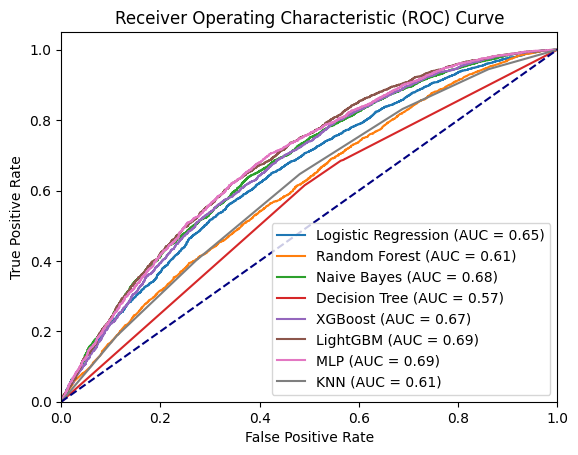

In [37]:
# Train different models
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("Naive Bayes", GaussianNB()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("XGBoost", XGBClassifier()),
    ("LightGBM", LGBMClassifier()),
    ("MLP", MLPClassifier()),
    ("KNN", KNeighborsClassifier())
]

# Calculate ROC curves and AUC scores
fpr = dict()
tpr = dict()
roc_auc = dict()

for name, model in models:
    # Train the model on the resampled training set
    model.fit(X_train_resampled, y_train_resampled)

    # Predict probabilities on the selected test set
    y_pred = model.predict_proba(X_test_scaled)[:, 1]

    # Calculate ROC curve and AUC on the test set
    fpr[name], tpr[name], _ = roc_curve(y_test, y_pred)
    roc_auc[name] = auc(fpr[name], tpr[name])

# Plot the ROC curves
plt.figure()

for name, model in models:
    plt.plot(fpr[name], tpr[name], label=f"{name} (AUC = {roc_auc[name]:.2f})")

plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


[LightGBM] [Info] Number of positive: 8909, number of negative: 8908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 17817, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500028 -> initscore=0.000112
[LightGBM] [Info] Start training from score 0.000112
[LightGBM] [Info] Number of positive: 8908, number of negative: 8909
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001450 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 17817, number of used features: 11
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

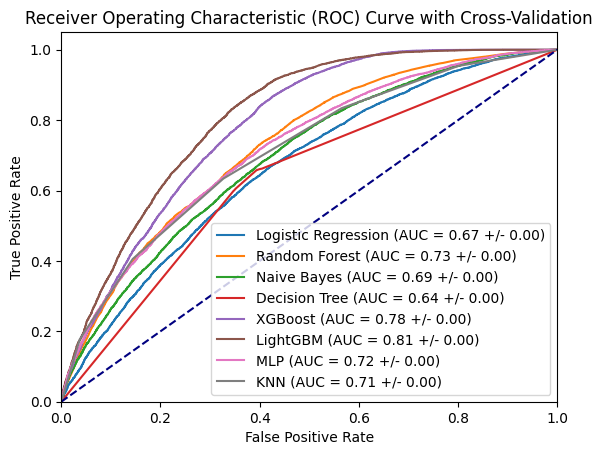

In [39]:
# Train different models
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("Naive Bayes", GaussianNB()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("XGBoost", XGBClassifier()),
    ("LightGBM", LGBMClassifier()),
    ("MLP", MLPClassifier()),
    ("KNN", KNeighborsClassifier())
]

# Calculate ROC curves and AUC scores with cross-validation
fpr = dict()
tpr = dict()
roc_auc = dict()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models:
    y_scores = cross_val_predict(model, X_train_resampled, y_train_resampled, cv=cv, method="predict_proba")[:, 1]
    fpr[name], tpr[name], _ = roc_curve(y_train_resampled, y_scores)
    roc_auc[name] = auc(fpr[name], tpr[name])

# Plot the ROC curves
plt.figure()

for name, model in models:
    plt.plot(fpr[name], tpr[name], label=f"{name} (AUC = {np.mean(roc_auc[name]):.2f} +/- {np.std(roc_auc[name]):.2f})")

plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve with Cross-Validation")
plt.legend(loc="lower right")
plt.show()

[LightGBM] [Info] Number of positive: 8909, number of negative: 8908
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004951 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 17817, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500028 -> initscore=0.000112
[LightGBM] [Info] Start training from score 0.000112
[LightGBM] [Info] Number of positive: 8908, number of negative: 8909
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001581 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 17817, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499972 -> initscore=-0.000112
[LightGBM]

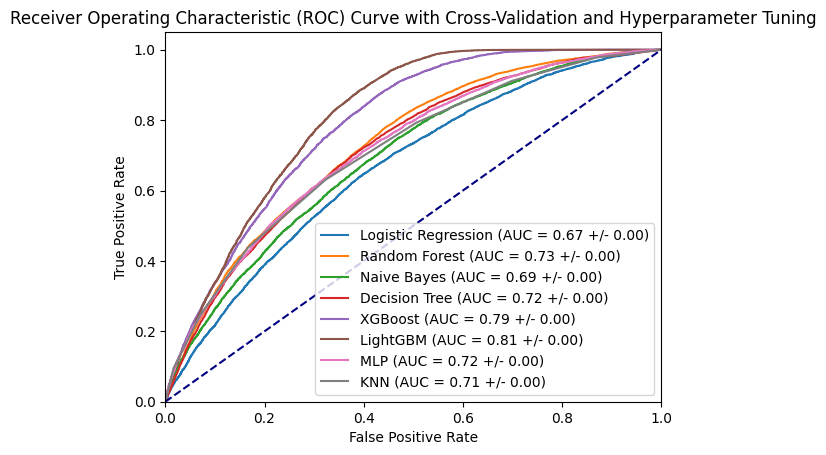

In [42]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np


# Define models with their respective hyperparameter grids
models = [
    ("Logistic Regression", LogisticRegression(), {'C': [0.001, 0.01, 0.1, 1, 10]}),
    ("Random Forest", RandomForestClassifier(), {'n_estimators': [50, 100]}),
    ("Naive Bayes", GaussianNB(), {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}),
    ("Decision Tree", DecisionTreeClassifier(), {'max_depth': [None, 10, 20]}),
    ("XGBoost", XGBClassifier(), {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [200]}),
    ("LightGBM", LGBMClassifier(), {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [300]}),
    ("MLP", MLPClassifier(), {'hidden_layer_sizes': [(50,), (100,)], 'max_iter': [1000]}),
    ("KNN", KNeighborsClassifier(), {'n_neighbors': [3, 5, 7, 9, 11],'weights': ['uniform', 'distance'],'algorithm': ['auto', 'kd_tree', 'ball_tree']})
]

# Calculate ROC curves and AUC scores with hyperparameter tuning and cross-validation
fpr = dict()
tpr = dict()
roc_auc = dict()
precision = dict()
recall = dict()
f1 = dict()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model, param_grid in models:
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='roc_auc')
    grid_search.fit(X_train_resampled, y_train_resampled)

    # Best hyperparameters
    best_model = grid_search.best_estimator_

    # Calculate ROC curve for the best model
    y_scores = cross_val_predict(best_model, X_train_resampled, y_train_resampled, cv=cv, method="predict_proba")[:, 1]
    fpr[name], tpr[name], _ = roc_curve(y_train_resampled, y_scores)
    roc_auc[name] = auc(fpr[name], tpr[name])

    # Calculate precision, recall, and F1 score for the best model
    y_pred = cross_val_predict(best_model, X_train_resampled, y_train_resampled, cv=cv)
    precision[name] = precision_score(y_train_resampled, y_pred)
    recall[name] = recall_score(y_train_resampled, y_pred)
    f1[name] = f1_score(y_train_resampled, y_pred)

# Print ROC AUC and hyperparameter values for each model
for name, model, _ in models:
    print(f"{name} - ROC AUC: {np.mean(roc_auc[name]):.4f}")
    print(f"{name} - Precision: {precision[name]:.4f}")
    print(f"{name} - Recall: {recall[name]:.4f}")
    print(f"{name} - F1 Score: {f1[name]:.4f}")
    print("--------------------")

# Plot the ROC curves
plt.figure()

for name, model, _ in models:
    plt.plot(fpr[name], tpr[name], label=f"{name} (AUC = {np.mean(roc_auc[name]):.2f} +/- {np.std(roc_auc[name]):.2f})")

plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve with Cross-Validation and Hyperparameter Tuning")
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression


# **Logistic Regression**

In [ ]:
# Initialize the logistic regression model
logistic_reg = LogisticRegression()

# Train the logistic regression model
logistic_reg.fit(X_train_scaled, y_train)

# Make predictions on the test set
predict_train = logistic_reg.predict(X_train)
y_pred_logistic_reg = logistic_reg.predict(X_test)

# **Decision Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
# Creating Decision Tree classifer object

clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Training the Decision Tree Classifer

clf = clf.fit(X_train,y_train)

# Predicting the response for test dataset

y_pred_clf = clf.predict(X_test)

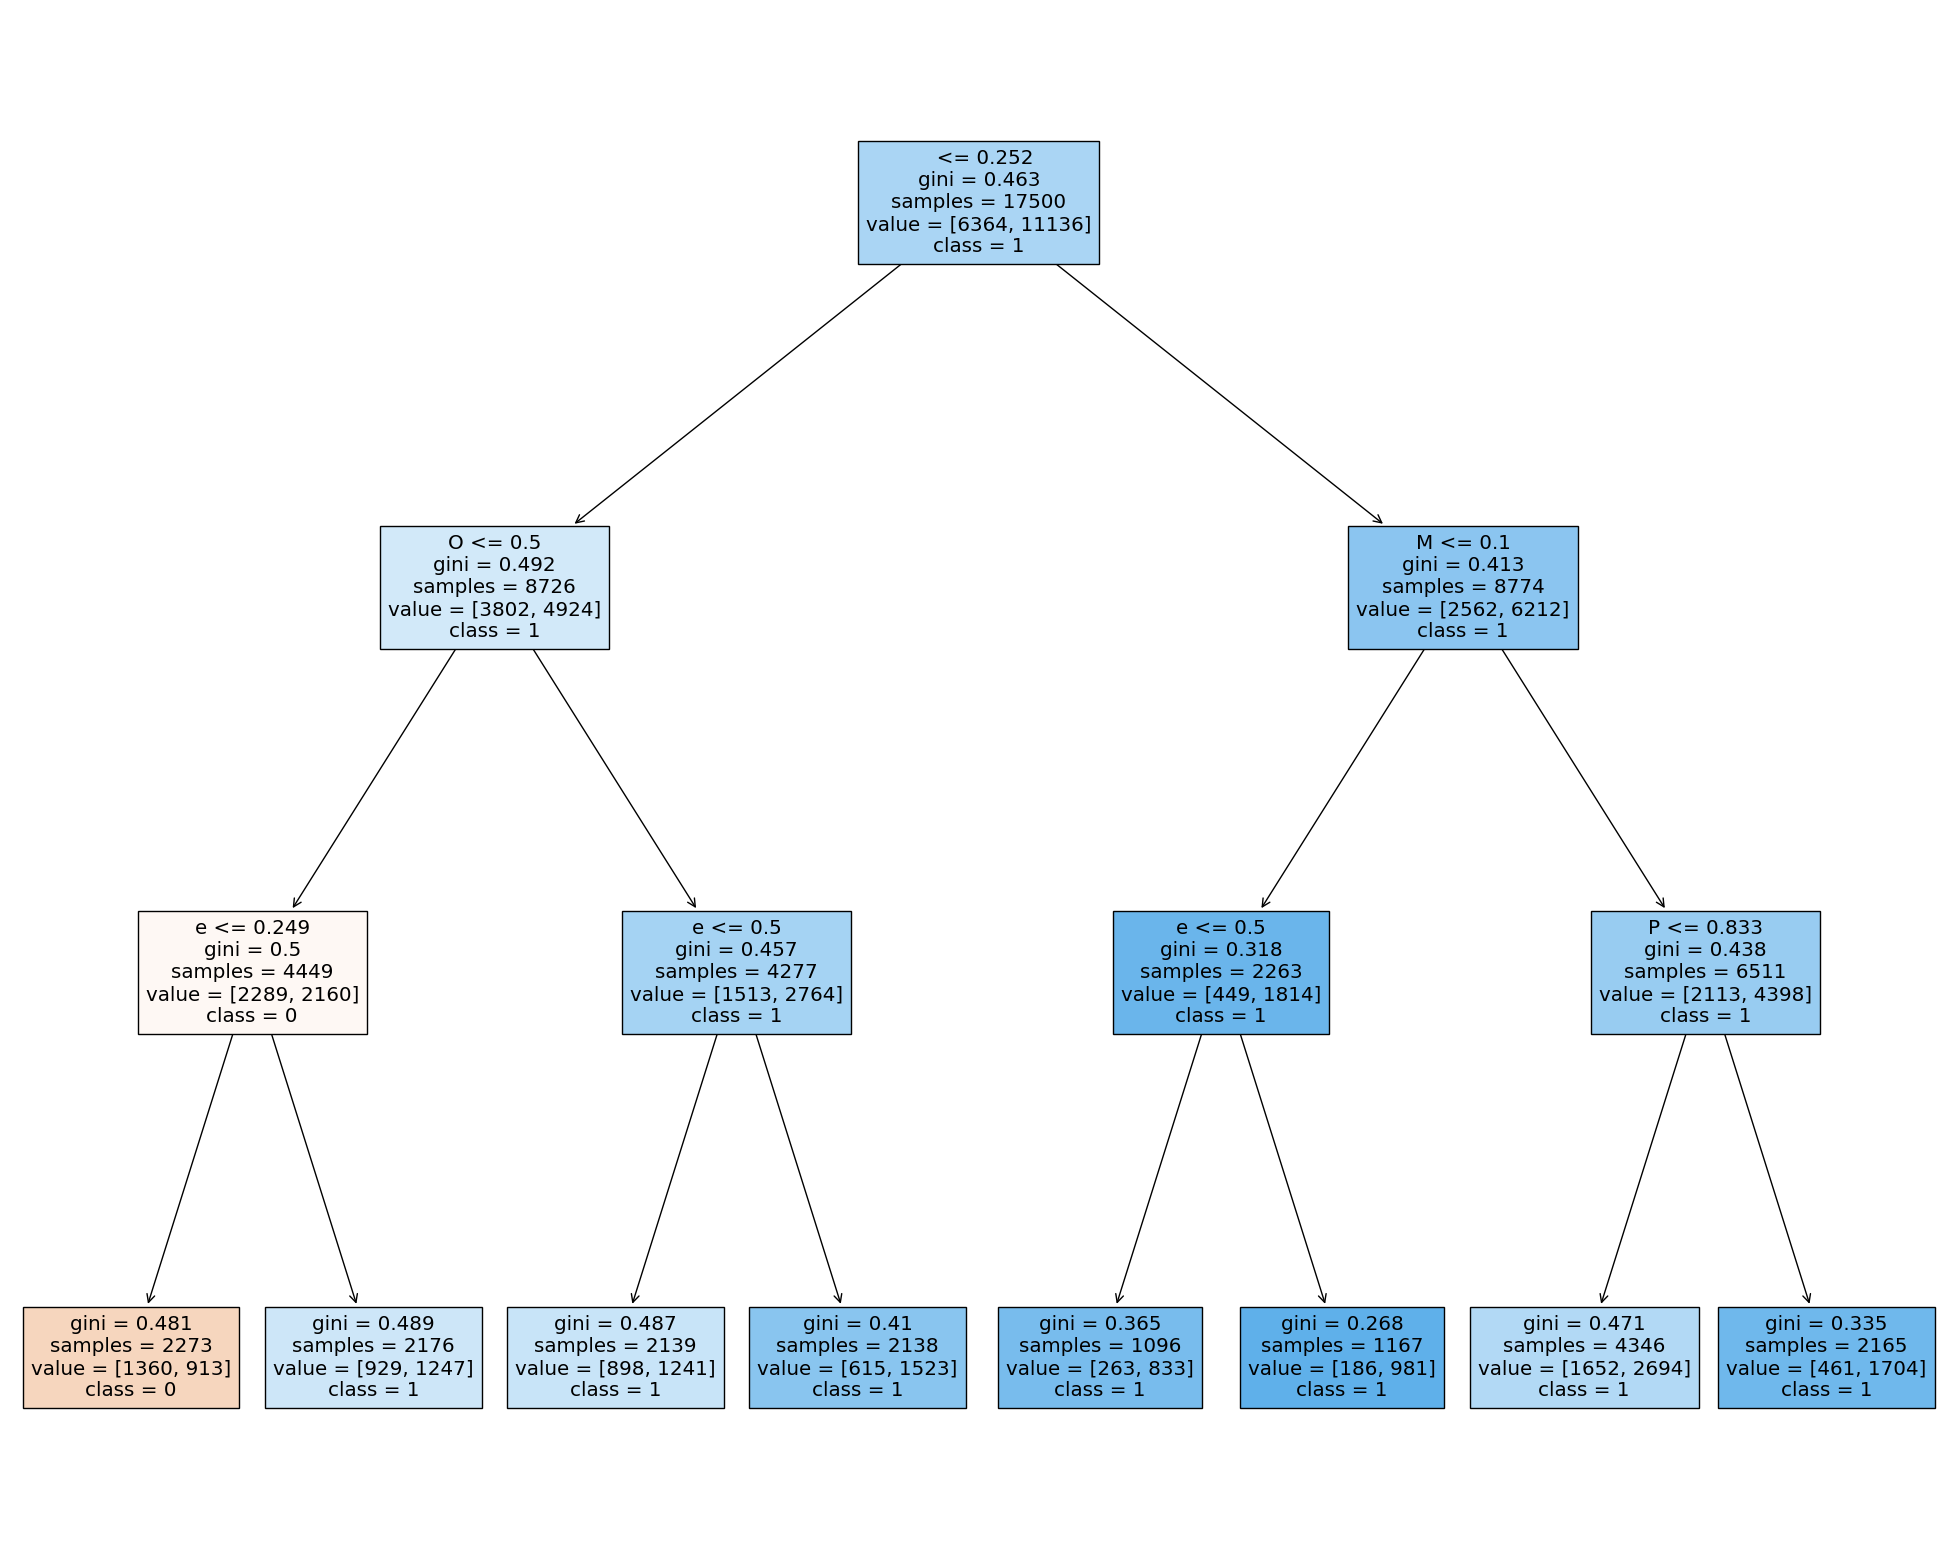

In [ ]:
# Plotting the Tree

fig = plt.figure(figsize=(25,20))
DecisionTree = tree.plot_tree(clf, feature_names='MPOX PCR Result',
                   class_names=['0','1'],
                   filled=True)

# **KNN Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Creating KNN classifier

knn = KNeighborsClassifier(n_neighbors = 30)

# Fitting the classifier to the data

knn = knn.fit(X_train,y_train)

# Showing the first 5 model predictions on the test data

y_pred_knn = knn.predict(X_test)

Text(0, 0.5, 'Mean Error')

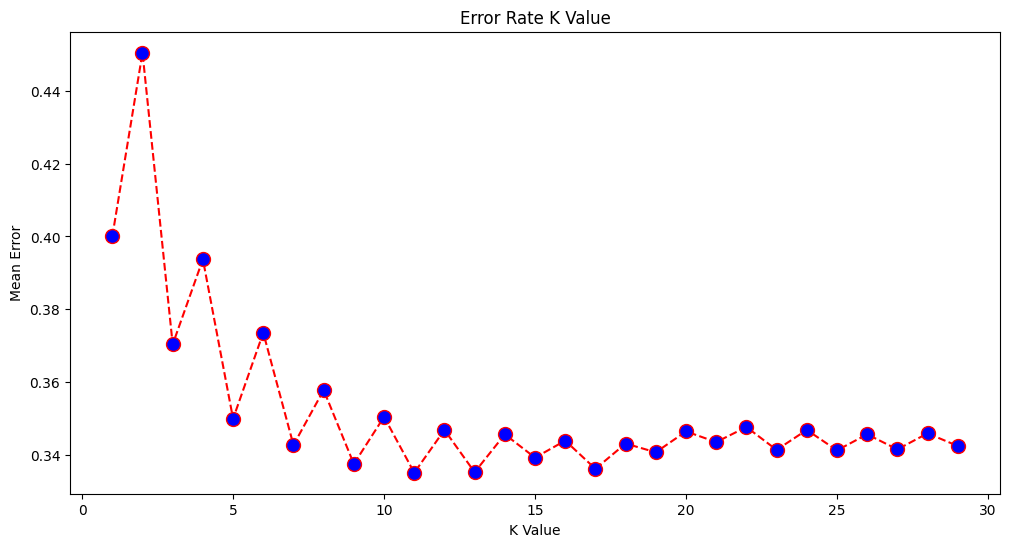

In [ ]:
# Calculating error for K values between 1 and 30

error = []
import numpy as np
import matplotlib.pyplot as plt

# Calculating error for K values between 1 and 25

for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)

    #Fit

    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    error.append(np.mean(y_pred_knn != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


# **SVM Model**

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Initialize the logistic regression model
svc = SVC(kernel='linear')

# Train the logistic regression model
svc.fit(X_train, y_train)

# Make predictions on the test set
predict_train = svc.predict(X_train)
y_pred_svc = svc.predict(X_test)

# **Naive Bayes Model**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Naive Bayes Classifer

gnb = GaussianNB()
# Training Naive Bayes Classifer

gnb.fit(X_train, y_train)

# Making Prediction on the Test Dataset

y_pred_gnb = gnb.predict(X_test)


# **Evaluating Metrics Performance**



In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

logistic_reg_score = accuracy_score(y_test, y_pred_logistic_reg)
dt_score = accuracy_score(y_test, y_pred_clf)
knn_score = accuracy_score(y_test, y_pred_knn)
svc_score = accuracy_score(y_test, y_pred_svc)
nb_score = accuracy_score(y_test, y_pred_gnb)

print("Accuracy score (Logistic Regression): ", logistic_reg_score)
print("Accuracy score (DecisionTree): ", dt_score)
print("Accuracy score (KNN): ", knn_score)
print("Accuracy score (SVC): ", svc_score)
print("Accuracy score (Naive Bayes): ", nb_score)

Accuracy score (Logistic Regression):  0.6706666666666666
Accuracy score (DecisionTree):  0.6621333333333334
Accuracy score (KNN):  0.6574666666666666
Accuracy score (SVC):  0.6364
Accuracy score (Naive Bayes):  0.6832


In [ ]:
# Prediction on Test Dataset


# Logistic
print(confusion_matrix(y_test,y_pred_logistic_reg))
print(classification_report(y_test,y_pred_logistic_reg))

# Decision Tree
print(confusion_matrix(y_test,y_pred_clf))
print(classification_report(y_test,y_pred_clf))

# KNN
print(confusion_matrix(y_test,y_pred_knn))
print(classification_report(y_test,y_pred_knn))


# SVM
print(confusion_matrix(y_test,y_pred_svc))
print(classification_report(y_test,y_pred_svc))

# Naive Bayes
print(confusion_matrix(y_test,y_pred_gnb))
print(classification_report(y_test,y_pred_gnb))

[[ 760 1967]
 [ 503 4270]]
              precision    recall  f1-score   support

           0       0.60      0.28      0.38      2727
           1       0.68      0.89      0.78      4773

    accuracy                           0.67      7500
   macro avg       0.64      0.59      0.58      7500
weighted avg       0.65      0.67      0.63      7500

[[ 564 2163]
 [ 371 4402]]
              precision    recall  f1-score   support

           0       0.60      0.21      0.31      2727
           1       0.67      0.92      0.78      4773

    accuracy                           0.66      7500
   macro avg       0.64      0.56      0.54      7500
weighted avg       0.65      0.66      0.61      7500

[[ 844 1883]
 [ 686 4087]]
              precision    recall  f1-score   support

           0       0.55      0.31      0.40      2727
           1       0.68      0.86      0.76      4773

    accuracy                           0.66      7500
   macro avg       0.62      0.58      0.58    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


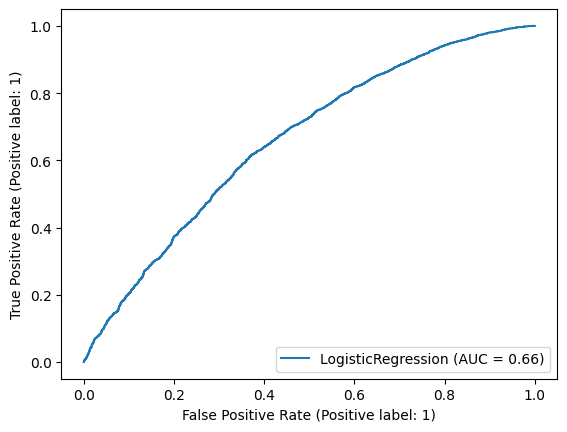

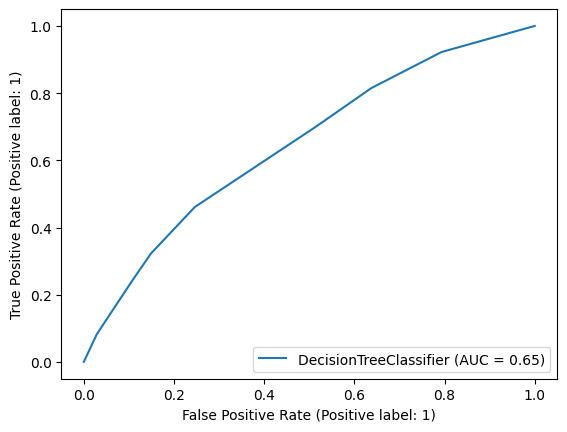

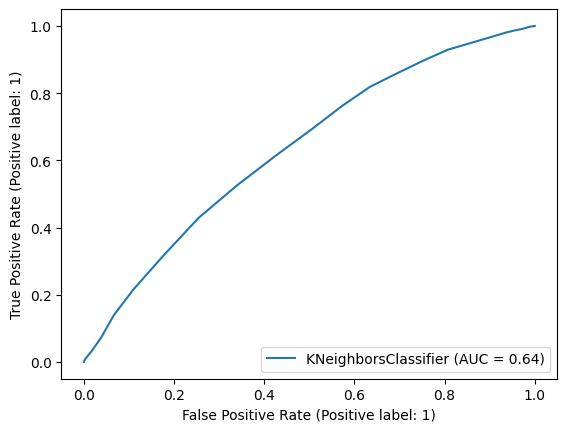

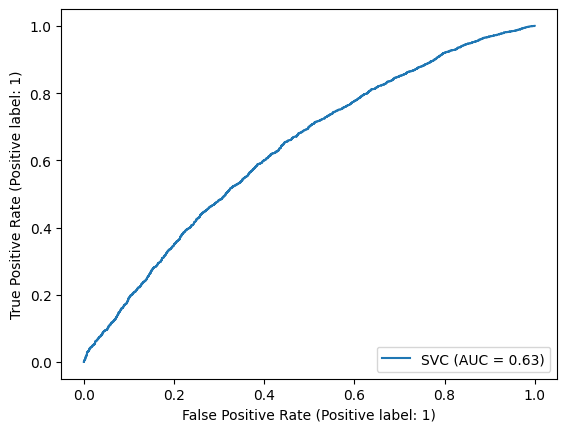

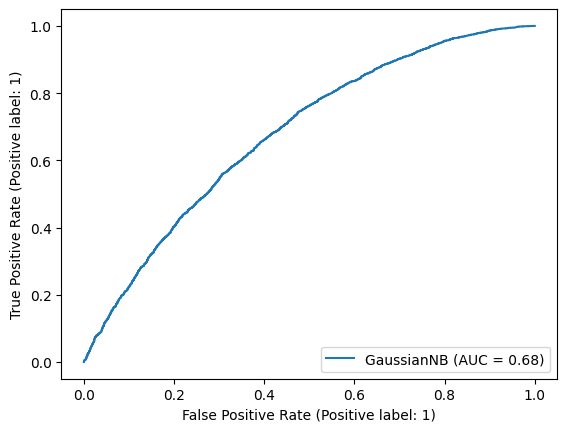

In [ ]:
#from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay
Logistic_reg_disp = RocCurveDisplay.from_estimator(logistic_reg, X_test, y_test)
clf_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)
knn_gs_disp = RocCurveDisplay.from_estimator(knn, X_test, y_test)
svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)
gnb_disp = RocCurveDisplay.from_estimator(gnb, X_test, y_test)

# **Hyperparameters**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [ ]:
# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 0.5, 1, 2, 5],
    'solver': ['sag', 'saga'],
    'penalty': ['l2', 'l1']
}

# Create the GridSearchCV object
lr_grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)

# Fit the model to the training data
lr_grid_search.fit(X, y)

# Get the best hyperparameters
best_params = lr_grid_search.best_params_

# Train the model with the best hyperparameters
model = LogisticRegression(**best_params)
model.fit(X, y)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the confusion matrix, precision, recall
confusion_matrix_ = confusion_matrix(y_test, y_pred)
precision_ = precision_score(y_test, y_pred)
recall_ = recall_score(y_test, y_pred)


# Print the results
print('Confusion matrix:')
print(confusion_matrix_)
print('Precision:', precision_)
print('Recall:', recall_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

Confusion matrix:
[[ 745 1982]
 [ 470 4303]]
Precision: 0.6846459824980111
Recall: 0.9015294364131573


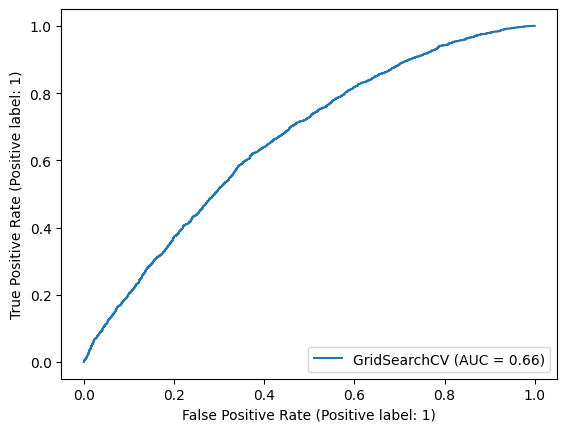

In [ ]:
log_disp = RocCurveDisplay.from_estimator(lr_grid_search, X_test, y_test)

**Decision Tree**

In [ ]:
# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}

# Create the GridSearchCV object
dt_grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

# Fit the model to the training data
dt_grid_search.fit(X, y)

# Get the best hyperparameters
best_params = dt_grid_search.best_params_

# Train the model with the best hyperparameters
model = DecisionTreeClassifier(**best_params)
model.fit(X, y)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the confusion matrix, precision, recall, and F1-score
confusion_matrix_ = confusion_matrix(y_test, y_pred)
precision_ = precision_score(y_test, y_pred)
recall_ = recall_score(y_test, y_pred)


# Print the results
print('Confusion matrix:')
print(confusion_matrix_)
print('Precision:', precision_)
print('Recall:', recall_)

Confusion matrix:
[[1003 1724]
 [ 557 4216]]
Precision: 0.7097643097643098
Recall: 0.8833019065577206


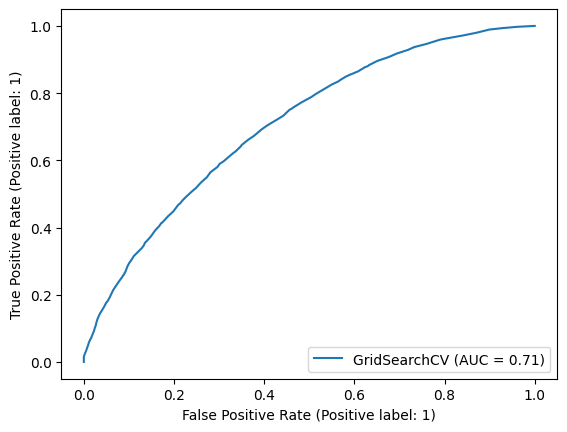

In [ ]:
dt_disp = RocCurveDisplay.from_estimator(dt_grid_search, X_test, y_test)

**KNN**

In [ ]:



# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'kd_tree', 'ball_tree']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

# Fit the model to the training data
grid_search.fit(X, y)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
model = KNeighborsClassifier(**best_params)
model.fit(X, y)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the confusion matrix, precision, recall, and F1-score
confusion_matrix_ = confusion_matrix(y_test, y_pred)
precision_ = precision_score(y_test, y_pred)
recall_ = recall_score(y_test, y_pred)


# Print the results
print('Confusion matrix:')
print(confusion_matrix_)
print('Precision:', precision_)
print('Recall:', recall_)



Confusion matrix:
[[1203 1524]
 [ 580 4193]]
Precision: 0.7334266223543817
Recall: 0.8784831342970878


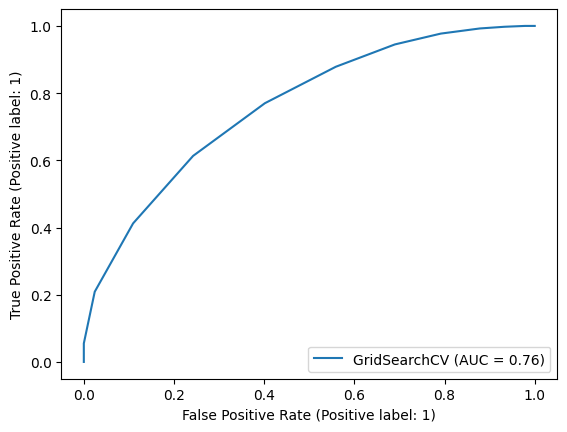

In [ ]:
log_disp = RocCurveDisplay.from_estimator(grid_search, X_test, y_test)

**SVM**

In [ ]:
# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 0.5, 1, 2, 5],
    'kernel': ['linear', 'rbf'],
    'degree': [2, 3, 4],
}

# Create the GridSearchCV object
svc_grid_search = GridSearchCV(SVC(), param_grid, cv=5)

# Fit the model to the training data
svc_grid_search.fit(X, y)

# Get the best hyperparameters
best_params = svc_grid_search.best_params_

# Train the model with the best hyperparameters
model = SVC(**best_params)
model.fit(X, y)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the confusion matrix, precision, recall, and F1-score
confusion_matrix_ = confusion_matrix(y_test, y_pred)
precision_ = precision_score(y_test, y_pred)
recall_ = recall_score(y_test, y_pred)

# Print the results
print('Confusion matrix:')
print(confusion_matrix_)
print('Precision:', precision_)
print('Recall:', recall_)


Confusion matrix:
[[ 839 1888]
 [ 355 4418]]
Precision: 0.7006026006977482
Recall: 0.925623297716321


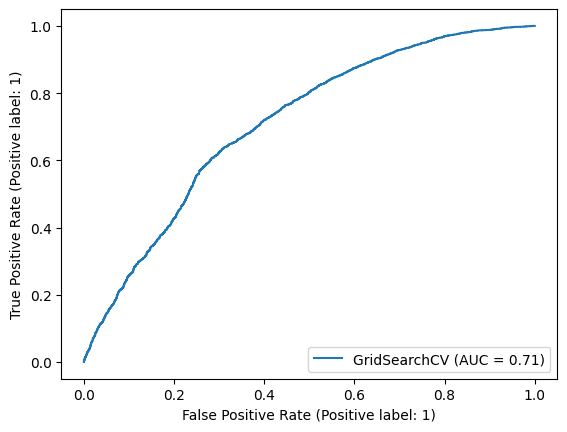

In [ ]:
log_disp = RocCurveDisplay.from_estimator(svc_grid_search, X_test, y_test)

In [ ]:
# Define the hyperparameter grid
# Define the hyperparameter grid for GaussianNB
param_grid = { 'var_smoothing': [0.001, 0.01, 0.1] }

# Create the GridSearchCV object for GaussianNB
nb_grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5)

# Fit the model to the training data
nb_grid_search.fit(X, y)

# Get the best hyperparameters
best_params = nb_grid_search.best_params_

# Train the model with the best hyperparameters
model = GaussianNB(**best_params)
model.fit(X, y)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the confusion matrix, precision, recall, and F1-score
confusion_matrix_ = confusion_matrix(y_test, y_pred)
precision_ = precision_score(y_test, y_pred)
recall_ = recall_score(y_test, y_pred)

# Print the results
print('Confusion matrix:')
print(confusion_matrix_)
print('Precision:', precision_)
print('Recall:', recall_)


Confusion matrix:
[[ 794 1933]
 [ 414 4359]]
Precision: 0.6927844882390337
Recall: 0.9132620993086109


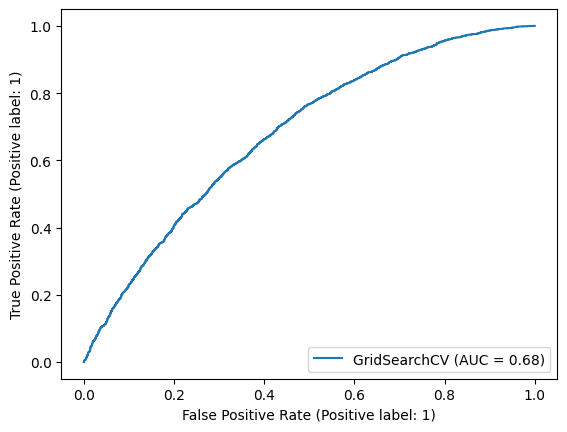

In [ ]:
log_disp = RocCurveDisplay.from_estimator(nb_grid_search, X_test, y_test)